In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import json
import math

In [2]:
gpuData = {}
with open('largeBench_single_cublas_0.json') as json_file:
    gpuData = json.load(json_file)

        
for exp in gpuData:
    exp['implementation'] = 'cuBLAS'

In [3]:
xilinxData = {}
with open('largeBench_single_fpga_0.json') as json_file:
    xilinxData = json.load(json_file)
    
    
for exp in xilinxData:
    exp['implementation'] = 'Xilinx'

In [4]:
cpuData = {}
with open('largeBench_single_openblas_0.json') as json_file:
    cpuData = json.load(json_file)
    

for exp in cpuData:
    exp['implementation'] = 'openBLAS'

In [5]:
data = cpuData + gpuData + xilinxData

In [6]:
for exp in data:
    
    noSizes = len(exp['n'])
    avgStd = 0.0
    
    for size, timings in list(zip(exp['n'], exp['runtimes'])):
        mean = np.mean(timings)
        std = np.std(timings)
        avgStd += std
        median = np.median(timings)
        implem = "{0:>10}".format(exp['implementation']) + ("S" if exp['precision']=='single' else "D")
        algo = "{0:>6}".format(exp['algo'])
        print("Exp. ", algo,implem, " N=", "2**{0:<12}".format(round(math.log(size,2),2)), " > mean:", "{:.5f}".format(mean), "+/-", "{:.5f}".format(std), " median: ", "{:.5f}".format(median))
    
    print("Avg std:", "{:.5f}".format(avgStd / noSizes))
    print()

Exp.  synthetic1Bench   openBLASS  N= 2**13.0          > mean: 0.56895 +/- 0.01998  median:  0.56535
Exp.  synthetic1Bench   openBLASS  N= 2**14.0          > mean: 1.90870 +/- 0.05139  median:  1.91469
Exp.  synthetic1Bench   openBLASS  N= 2**14.58         > mean: 4.06156 +/- 0.11116  median:  4.04556
Exp.  synthetic1Bench   openBLASS  N= 2**15.0          > mean: 7.17485 +/- 0.13992  median:  7.18058
Exp.  synthetic1Bench   openBLASS  N= 2**15.32         > mean: 11.42200 +/- 0.53711  median:  11.31613
Avg std: 0.17191

Exp.  synthetic1Bench     cuBLASS  N= 2**13.0          > mean: 2.70997 +/- 0.06279  median:  2.70289
Exp.  synthetic1Bench     cuBLASS  N= 2**14.0          > mean: 2.90410 +/- 0.04424  median:  2.90491
Exp.  synthetic1Bench     cuBLASS  N= 2**14.58         > mean: 3.32053 +/- 0.10707  median:  3.29092
Avg std: 0.07137

Exp.  synthetic1Bench     XilinxS  N= 2**13.0          > mean: 0.54165 +/- 0.06761  median:  0.57686
Exp.  synthetic1Bench     XilinxS  N= 2**14.0        

In [8]:
medianTimingsKernel1 = {}
medianTimingsKernel1['N'] = data[0]['n'] # [math.log(x, 2) for x in data[0]['n']]

for exp in data:

#   name = exp['algo'] + "_" + exp['implementation']
    name = exp['implementation']
    medianTimingsKernel1[name] = [np.median(timings) for timings in exp['runtimes']]

    
medianTimingsKernel1['cuBLAS'] += [0,0]
# print(medianTimingsKernel1)
    
print("\nchain single")
df_medianTimingsKernel1 = pd.DataFrame(data=medianTimingsKernel1)
display(df_medianTimingsKernel1)


chain single


,N,openBLAS,cuBLAS,Xilinx
0,8192,0.565354,2.702888,0.576858
1,16384,1.914686,2.904909,1.619080
2,24576,4.045557,3.290923,3.331447
3,32768,7.180578,0.000000,5.626383
4,40960,11.316127,0.000000,8.648509


<Figure size 432x288 with 0 Axes>

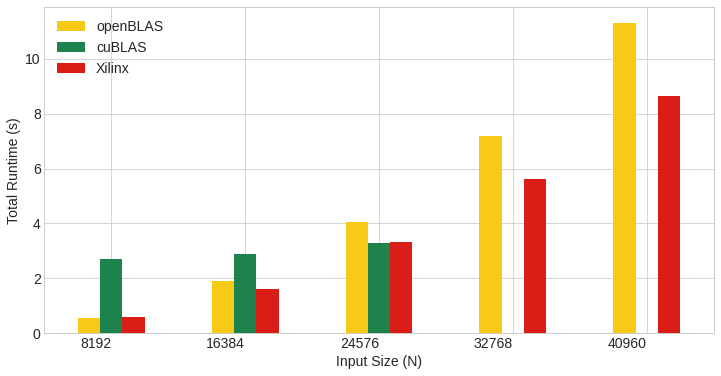

In [13]:
# CHAIN SINGLE
plt.rcParams.update({'font.size': 14})

barColors = [
    (247/255, 202/255, 24/255, 1.0), # openblas
    (30/255, 130/255, 76/255, 1.0), # cuda
    (217/255, 30/255, 24/255, 1.0), # xilinx
]

plt.style.use('seaborn-whitegrid')
fig = plt.figure()

ax = df_medianTimingsKernel1.plot(
    figsize=(12,6),
    x='N',
    y=['openBLAS', 'cuBLAS', 'Xilinx'],
    color=barColors,
    kind='bar',
    style='.-',
#     logy=True
)
    
ax.set_ylabel('Total Runtime (s)')
ax.set_xlabel('Input Size (N)')
plt.xticks(rotation=0, ha='right')


plt.savefig('benchPlot_single_totaltime.pdf', bbox_inches='tight')